# Resumen IIC-1103

***Por: Alfonso Irarrázaval.***

----

# Recursión

Se habla de recursion, o mas bien, de un elemento recursivo, cuando la definicion de este depende de su misma definicion.

Algunos de ustedes ya habran visto ejemplos de recursividad en otros ramos o materias, pero no necesariamente lo han visto por definicion como recursivos

Algunos de los ejemplos mas comunes son:

* Numeros Factoriales
* Series recursivas (eg. Serie de Fibonacci)

![rec](imgs/fixing_problems.webp "")

En el caso de los numeros factoriales:

n! = n \* (n - 1)!

Pero a su vez (n - 1)! = (n - 1) * (n - 2)!, entonces reemplazando:

n! = n \* (n - 1) \* (n - 2)!

n! = n \* (n - 1) \* (n - 2) \* (n - 3)!

y en general:

n! = n \* (n - 1) \* (n - 2) \* (n - 3) \* ... \* 2 \* 1

Se ve de manera directa que para obtener n! debemos saber de antemano el valor de (n - 1)!, el cual a su vez depende 
de (n - 2)!, el cual a su vez depende de (n - 3)!  y asi sucesivamente, hasta que llegamos al 0! (recordar que 0! = 1).

Aqui hemos llegado a una parte importante de la recursividad: el __caso base__

El __caso base__ se refiere a ese caso, el cual depende completamente de lo que se busca (puede ser un numero, el largo de una lista o string, etc..), en el que la recursion se detiene y comienza a "devolverse" (mas adelante veremos a que se refiere ese término)

Volviendo al ejemplo de los numeros factoriales, por definicion estos residen en los numeros cardinales, por lo que el minimo valor al que se puede llegar corresponde al 0, después estamos en un rango donde no estan definidos por lo cual no podemos entrar, en otras palabras, nuestro caso base es el 0 (notese que tambien podria ser 1, ya que 1! = 0! = 1).

Todo esto se traduce en la siguiente funcion para los numeros factoriales:

In [6]:
#Partimos definiendo la funcion como cualquier otra, donde recibirá el numero del cual queremos obtener el factorial
def factorial(n):
    #Lo primero que previsamos es si el numero ingresado es el CASO BASE, que en este caso seria 0
    if n == 0:
        #Cuando el numero es 0, retornamos el 
        print("llegamos al caso base, nos empezamos a devolver!")
        return 1
    #en cualquier otro caso, queremos obtener n * (n - 1)!
    else:
        print("{}! = {} * {}!".format(n, n, n - 1))
        factorial_siguiente = factorial(n - 1)
        print("{}! = {} * {}".format(n, n, factorial_siguiente))
        return n * factorial_siguiente

factorial(5)

5! = 5 * 4!
4! = 4 * 3!
3! = 3 * 2!
2! = 2 * 1!
1! = 1 * 0!
llegamos al caso base, nos empezamos a devolver!
1! = 1 * 1
2! = 2 * 1
3! = 3 * 2
4! = 4 * 6
5! = 5 * 24


120

Este poroceso en el que se "devuelve" se refleja de la siguiente manera:

https://files.realpython.com/media/stack.9c4ba62929cf.gif

Ahora llevemos la recursividad a la serie de fibonacci:

Recordar que el n-esimo numero de fibonacci se define como:

> a<sub>n</sub> = a<sub>n - 1</sub> + a<sub>n - 2</sub>

> con a<sub>0</sub> = 1 y a<sub>1</sub> = 1

Entonces es intuitivo que en este caso tenemos __dos casos base__

Ahora llevemoslo a la funcion:

In [8]:
def nesimo_fibonacci(n):
    #Revisamos si estamos en un caso base:
    if n == 0 or n == 1:
        return 1
    #si no es el caso, hacmos la suma:
    else:
        #obtenemos el n-1-esimo fibonacci y el n-2-esimo fibonacci y los sumamos
        precesor = nesimo_fibonacci(n - 1)
        anteprecesor = nesimo_fibonacci(n - 2)
        return precesor + anteprecesor

nesimo_fibonacci(5)

8

----

# Backtracking

Muchas veces podemos necesitar encontrar todos los __caminos__ que hay entre a y b de forma recursiva, por lo que mientras nosotros avanzamos en el camino, debemos ir __guardando__ todos los __nodos__ por los que he pasado, y cuando se llega a una posible solucion de el problema, guardar esa solucion aparte. 

Es importante señalar que a medida de que avanzamos por los nodos, el camino recorrido hasta ese punto corresponde a una __solucion parcial__, mientras que cuando se llega a el resultado deseado, se llega a una __solucion del problema__

Por ejemplo:

![rec](imgs/arbol.gif "")


Lo que vemos aqui son un conjunto de nodos en forma de árbol (se llama arbol porque parte de una _raiz_ y de ella salen nodos en forma de _ramas_ hasta llegar a las _hojas_, que son aquellos nodos de término, o de donde no salen mas ramas). Supongamos que queremos recorrer este arbol y obtener todos los caminos hasta las hojas, lo que se busca es obtener los caminos:

2 - 7 - 2

2 - 6 - 5

2 - 6 - 11

2 - 5 - 9 - 4

Esto se logra de manera __recursiva__, guardando donde hemos estado.

Tambien se puede observar que, por ejemplo, 2 - 5 - 9 corresponde a una solucion parcial de el problema, ya que si bien es un camino posible en nuestro arbol, no es el camino final que buscamos.

Veamos un ejemplo mas concreto:

__Pregunta 4 Examen 2016 - 2_

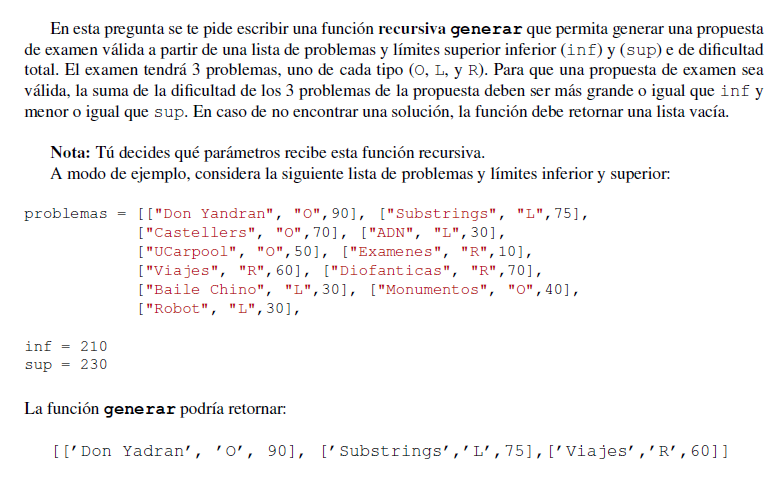
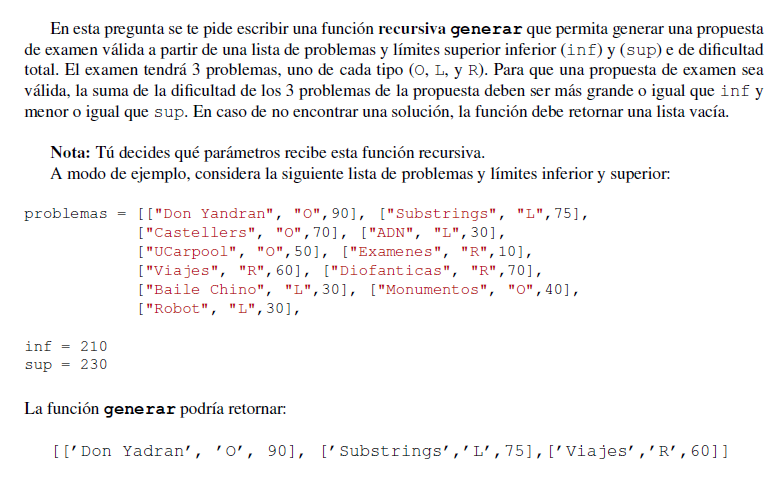


Lo que se pide entonces, es encontrar todas las combinaciones de ejercicios que cumplan con los requisitos dados, un __posible__ codigo sería:


In [14]:
import copy

### Cuando llamamos a nuestra funcion, le damos como parametros las soluciones parciales y soluciones finales que tenemos
### Hay que recordar que si bien en un principio estas van a estar vacias, a medida que avanzamos por los nodos estas iran
### tomando valores, por lo que pueden cambiar para recursion. (si se hace de esta forma, siempre hay que incluir estos dos 
### parametros)

### Ademas le entregamos parametros que son relacionados con el problema en si (problemas, sup, inf)
def generar(solucion_parcial, soluciones, problemas, sup, inf):
    
    #reseteamos la dificultad y los tipos de preguntas que hay en la solucion parcial para calcularla cuando se llega a cada nodo
    
    dificultad = 0
    tipos_preguntas = []
    
    #definimos una variable que me diga si lo que llevamos recorrido contiene una pregunta de tipo "O", "R" y "l"
    
    contiene_todo_tipo_de_preguntas = False
    
    # Para nuestra solucion parcial, calculamos la suma de las dificultades de todas las preguntas que tiene, y ademas 
    # agregamos a nuestra lista tipo_preguntas los tipos de pregunta de cada una de las preguntas de nuestra solucion parcial
    # recordatorio: cada pregunta viene en formato de lista de la forma [nombre, tipo, dificultad]
    
    for i in range(len(solucion_parcial)):
        #sumamos la dificultad de cada pregunta
        dificultad += int(solucion_parcial[i][2])
        #agregamos el tipo de preguntas a nuestra lista de tipos
        tipos_preguntas.append(solucion_parcial[i][1])
        
    # Con esta lista de tipos, revisamos si contiene todos los tipos de preguntas, si lo hace, cambiamos nuestra variable 
    # que lo indica para tener esa informacion guardada
    
    if "O" in tipos_preguntas and "R" in tipos_preguntas and "L" in tipos_preguntas:
        #cambiamos el valor de la variable
        contiene_todo_tipo_de_preguntas = True
    
    # Como una prueba no puede tener mas de 3 preguntas, su nuestra solucion parcial tiene mas de 3 preguntas retornamos y 
    # no hacemos nada con ella
    if len(solucion_parcial) > 3:
        return
    
    # Pero si nuestra solucion parcial es de largo 3, la suma de las dificultades de sus preguntas esta entre inf y sup,
    # y ademas cumple con que tiene todo tipo de preguntas, entonces estamos en el caso de una solucion final (recordar 
    # que pueden ser muchas)
    if len(solucion_parcial) == 3 and (inf <= dificultad <= sup) and contiene_todo_tipo_de_preguntas == True:
        # el copy.copy(algo) nos permite trabajar con una nueva lista que es exactamente igual a la anterior, pero que no 
        # le afectara en nada a la original si cambio algo 
        una_solucion_final = copy.copy(solucion_parcial)
        
        #finalmente agregamos esta solucion final a mi lista con todas las soluciones finales
        soluciones.append(una_solucion_final)
        
    # Esta corresponde a la parte recursiva de nuestra funcion, por cada opcion de siguiente problema a agregar se agrega a la 
    # solucion parcial y se calcula el generar con estos nuevos solucion_parcial y soluciones
    for opcion in problemas:
        # primero se agregara la opcion a la solucion parcial
        solucion_parcial.append(opcion)
        # ahora se le aplica la ecursiona los nuevos solucion_parcial y soluciones
        generar(solucion_parcial, soluciones, problemas, sup, inf)
        # finalmente se saca el ultimo elemento agregado para poder agregar la siguiente opcion sin problemas
        solucion_parcial.pop()
    #finalmente retornamos nuestra lista con todas las soluciones finales
    return soluciones

problemas = [["Don Yandran", "O",90], ["Substrings", "L",75],
["Castellers", "O",70], ["ADN", "L",30],
["UCarpool", "O",50], ["Examenes", "R",10],
["Viajes", "R",60], ["Diofanticas", "R",70],
["Baile Chino", "L",30], ["Monumentos", "O",40],
["Robot", "L",30]]
sup = 230
inf = 210

#recordar que en un principio las dos listas comienzan vacias
lista_soluciones = generar([], [], problemas, sup, inf)
for elem in lista_soluciones:
    print(elem)


[['Don Yandran', 'O', 90], ['Substrings', 'L', 75], ['Viajes', 'R', 60]]
[['Don Yandran', 'O', 90], ['Viajes', 'R', 60], ['Substrings', 'L', 75]]
[['Substrings', 'L', 75], ['Don Yandran', 'O', 90], ['Viajes', 'R', 60]]
[['Substrings', 'L', 75], ['Castellers', 'O', 70], ['Diofanticas', 'R', 70]]
[['Substrings', 'L', 75], ['Viajes', 'R', 60], ['Don Yandran', 'O', 90]]
[['Substrings', 'L', 75], ['Diofanticas', 'R', 70], ['Castellers', 'O', 70]]
[['Castellers', 'O', 70], ['Substrings', 'L', 75], ['Diofanticas', 'R', 70]]
[['Castellers', 'O', 70], ['Diofanticas', 'R', 70], ['Substrings', 'L', 75]]
[['Viajes', 'R', 60], ['Don Yandran', 'O', 90], ['Substrings', 'L', 75]]
[['Viajes', 'R', 60], ['Substrings', 'L', 75], ['Don Yandran', 'O', 90]]
[['Diofanticas', 'R', 70], ['Substrings', 'L', 75], ['Castellers', 'O', 70]]
[['Diofanticas', 'R', 70], ['Castellers', 'O', 70], ['Substrings', 'L', 75]]


----
### NOTAS IMPORTANTES

* Para recursion y backtracking (y programacion en general), no existe una unica forma o una formula exacta para resolver un ejercicio
* Siempre recordar el __caso base__, ya que sin el nuestra recursion nunca va a parar y su computador puede explotar (okno)
* En backtracking es importante ir guardando el progreso y  todas aquellas soluciones que cumplen el objetivo final por separado, y pasarlas durante la recursion
* Para el examen lleven ojala un chocolate y agua porque es largo

----
### Otros ejercicios

Aca se dejara otro ejemplo de examen que incluia recursion y backtracking para que lo hagan y revisen:


Pregunta 4 Examen 2015 - 2

![back1](imgs/pregunta_backtracking.png "")

Una __posible__ solucion de a):

In [20]:
def mezclar(s1, s2):
    if len(s1) == 0 and len(s2) == 0:
        return ''
    else:
        if len(s1) == 0:
            return s2[0] + mezclar(s1, s2[1:])
        elif len(s2) == 0:
            return s1[0] + mezclar(s1[1:], s2)
        else:
            if s1[0] < s2[0]:
                return s1[0] + mezclar(s1[1:], s2)
            else:
                return s2[0] + mezclar(s1, s2[1:])

print(mezclar("aceg", "bdfh"))
print(mezclar("amor", "luz"))

abcdefgh
almoruz


Una __posible__ solucion para b)

In [22]:
def calcular_strings(soluciones, solucion_parcial, n):
    if len(solucion_parcial) == int(n):
        solucion_final = solucion_parcial.copy()
        aux = ''.join(solucion_final)
        if not (aux in soluciones):
            soluciones.append(aux)
        return

    for opcion in ['0', '1']:
        solucion_parcial.append(opcion)
        calcular_strings(soluciones, solucion_parcial, n)
        solucion_parcial.pop()
    return soluciones


for i in range 
print(calcular_strings([], [], 3))

['000', '001', '010', '011', '100', '101', '110', '111']